In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
import bug_utils as bug
import importlib
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
importlib.reload(bug)


<module 'bug_utils' from 'C:\\Users\\flyin\\Google Drive\\data projects\\hexbot\\bug_utils.py'>

In [5]:
bug.rmse

<function bug_utils.rmse>

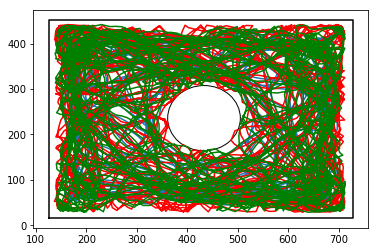

In [2]:
traj_fig = bug.show_video_trajectory("330 minute 1_features.csv")

In [3]:
train_df, label_df = bug.split_all_videos_random(10,19,1)

train_df (10, 38) label_df (10, 2)


In [4]:
train_df.head()

0              1               2               3               4   \
      C_x    C_y     C_x     C_y     C_x     C_y     C_x     C_y     C_x   
0  173.75  330.5  173.75  340.00  171.25  350.50  168.00  362.50  164.00   
1  682.50  409.0  680.25  408.50  680.50  408.00  676.25  409.75  678.50   
2  226.25  349.0  213.50  342.75  202.75  337.25  191.25  331.50  179.75   
3  237.00  403.5  240.00  399.00  245.50  397.50  253.50  399.75  261.00   
4  367.50  381.5  374.50  374.00  382.00  365.00  389.50  357.00  397.75   

            ...        14              15              16              17  \
      C_y   ...       C_x     C_y     C_x     C_y     C_x     C_y     C_x   
0  375.00   ...    196.00  407.50  202.50  407.25  210.75  405.25  220.50   
1  410.75   ...    677.25  412.25  679.25  412.25  676.50  411.00  677.25   
2  325.75   ...    179.25  244.00  174.00  236.25  167.75  229.50  173.75   
3  402.50   ...    374.00  417.00  386.50  417.75  398.50  417.25  412.00   
4  345.50   ...    467.25  352.25  477.75  349.75  487.00  345.50  495.50   

              18          
      C_y    C_x     C_y  
0  405.50  231.0  405.00  
1  414.00  675.0  415.75  
2  224.00  176.5  215.50  
3  416.75  423.5  416.00  
4  341.00  504.5  336.00  

[5 rows x 38 columns]

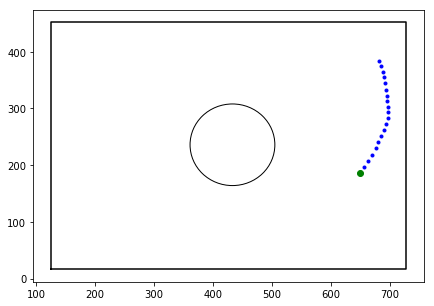

In [5]:
bug.show_sample(train_df, label_df, 5)
# bug.show_preds(train_df, label_df, preds_df, 5)

In [17]:
run1 = {"data_sampler": "random", "n_samples": 15000, "n_trains":[10], "n_labels": [1,5,100], 
        "models":[Ridge(), RandomForestRegressor()], "train_features": ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top","dist_A_right","dist_A_bottom","dist_A_center","dist_B_left","dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], "label_features": ['C_x', 'C_y'] }

d = bug.multi_run(run1)
# print(d["rmse_results"])


score: 4.012489100127861, model: Ridge, n_samples: 15000, n_train: 10, n_label: 1
score: 5.066233057360096, model: RandomForestRegressor, n_samples: 15000, n_train: 10, n_label: 1
score: 8.347617098857537, model: Ridge, n_samples: 15000, n_train: 10, n_label: 5
score: 8.516166989976108, model: RandomForestRegressor, n_samples: 15000, n_train: 10, n_label: 5
score: 121.27690646001675, model: Ridge, n_samples: 15000, n_train: 10, n_label: 100
score: 94.28539765888394, model: RandomForestRegressor, n_samples: 15000, n_train: 10, n_label: 100


In [18]:
run1 = {"data_sampler": "random", "n_samples": 15000, "n_trains":[20], "n_labels": [1,5,100], 
        "models":[Ridge(), RandomForestRegressor()], "train_features": ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top","dist_A_right","dist_A_bottom","dist_A_center","dist_B_left","dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], "label_features": ['C_x', 'C_y'] }
d = bug.multi_run(run1)



score: 4.190920395084451, model: Ridge, n_samples: 15000, n_train: 20, n_label: 1
score: 5.187448270152735, model: RandomForestRegressor, n_samples: 15000, n_train: 20, n_label: 1
score: 8.191079225413915, model: Ridge, n_samples: 15000, n_train: 20, n_label: 5
score: 8.57814398883258, model: RandomForestRegressor, n_samples: 15000, n_train: 20, n_label: 5
score: 120.39415362819287, model: Ridge, n_samples: 15000, n_train: 20, n_label: 100
score: 90.94199610058972, model: RandomForestRegressor, n_samples: 15000, n_train: 20, n_label: 100


score: 124.55265062988619, model: RandomForestRegressor, n_samples: 527, n_train: 20, n_label: 100
rmse: 98.48997046019457, mean error: 78.6625


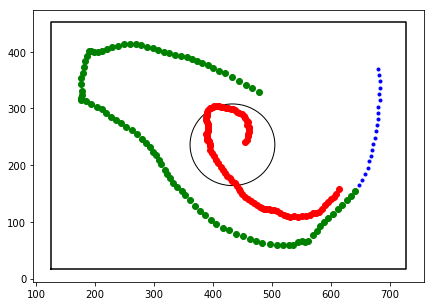

In [97]:
run1 = {"data_sampler": "ordered", "n_samples": 5000, "n_trains":20, "n_labels": 100, 
        "models":RandomForestRegressor(), "train_features": ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top","dist_A_right","dist_A_bottom","dist_A_center","dist_B_left","dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], "label_features": ['C_x', 'C_y'] }
model, d = bug.single_run(run1)
check_model(run1, model)

rmse: 47.00360564626931, mean error: 33.786750000000005


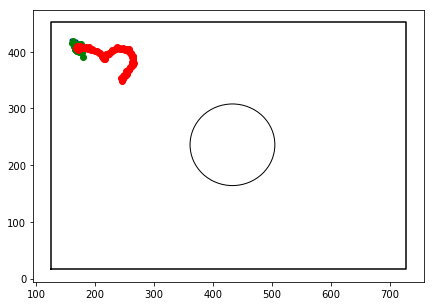

In [120]:
check_model(run1, model)

In [49]:
run1 = {"data_sampler": "random", "n_samples": 5000, "n_trains":20, "n_labels": 100, 
        "models":RandomForestRegressor(), "train_features": ["A_x","A_y","B_x","B_y","C_x","C_y","dist_A_left","dist_A_top","dist_A_right","dist_A_bottom","dist_A_center","dist_B_left","dist_B_top","dist_B_right","dist_B_bottom","dist_B_center"], "label_features": ['C_x', 'C_y'] }
model, d = bug.single_run(run1)
check_model(run1, model)

score: 105.57801986000511, model: RandomForestRegressor, n_samples: 5000, n_train: 20, n_label: 100


rmse: 82.24206312389664, mean error: 62.260875000000006


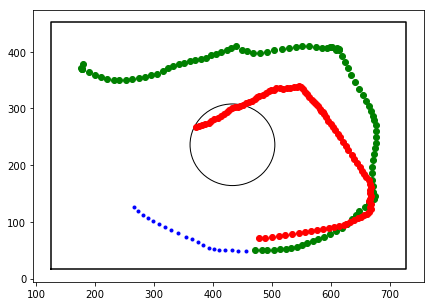

In [96]:
def check_model(prms_dic, model):
    train_one, label_one = bug.split_all_videos_random(1, prms_dic["n_trains"], prms_dic["n_labels"], 
                                                                   prms_dic["train_features"], 
                                                                   prms_dic["label_features"], 
                                                                   debug=False)
#     print(label_one)
    preds = model.predict(train_one)
    preds_index = pd.MultiIndex.from_product([range(prms_dic["n_labels"]), prms_dic["label_features"]])
    preds_df = pd.DataFrame(preds, columns=preds_index)
#     preds = pd.DataFrame(preds.reshape(100,2), columns=["C_x","C_y"])
#     print(pd.DataFrame(preds.reshape(100,2), columns=["C_x","C_y"]))
    print("rmse: {}, mean error: {}".format(bug.rmse(preds_df.values, label_one.values), np.mean(np.abs(preds_df.values-label_one.values))))
    bug.show_pred(train_one, label_one, preds_df)
check_model(run1, model)

In [31]:
preds.shape

NameError: name 'preds' is not defined

In [15]:
run2 = {"data_sampler": "random", "n_samples":1500, "n_trains":[20], "n_labels": [1,5,100], 
        "models":[Ridge()], "train_features": ["C_x","C_y"], "label_features": ['C_x', 'C_y'] }

d = bug.multi_run(run2)

score: 3.76661012138589, model: Ridge, n_samples: 1500, n_train: 20, n_label: 1
score: 8.625003263788269, model: Ridge, n_samples: 1500, n_train: 20, n_label: 5
score: 119.76055387330999, model: Ridge, n_samples: 1500, n_train: 20, n_label: 100


[4.6387098474753365, 4.022514344365051, 3.451220380345995, 3.7756347186115136, 3.9240100376215636, 3.95282507382786, 4.242088323979196, 4.2844233376437515, 3.968773673122864, 4.217991788874924, 4.090966319556591, 3.8885171790674393, 4.184955333801465, 4.188622673432256, 4.0848553788043755, 4.064984450527128, 4.248860080519104, 3.8595873858285366, 4.091610671926055, 4.237643189408351]
[4.974765114503922, 4.069822410861648, 3.826313084673462, 3.8504239454877407, 4.139042480248125, 4.035820562226621, 4.245521441736008, 4.1244370154570325, 3.997499068294803]


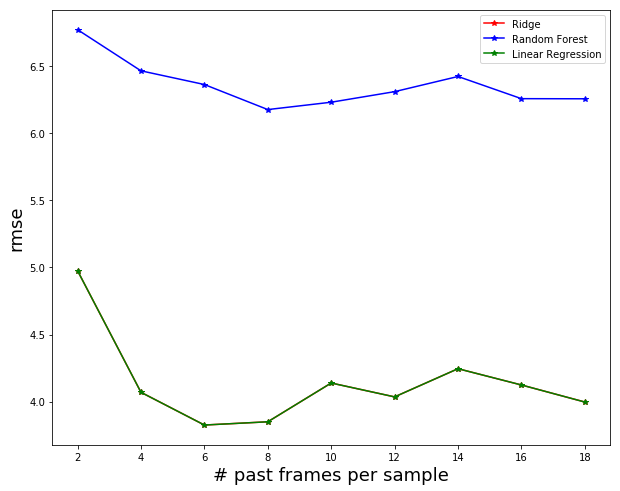

In [90]:
print(results_all)

fig,ax = plt.subplots(figsize = (10,8))
ax.plot(n_trains, results_ridge, 'r*-', label='Ridge')
ax.plot(n_trains, results_rf, 'b*-', label='Random Forest')
ax.plot(n_trains, results_linear, 'g*-', label='Linear Regression')
ax.legend()
plt.xlabel("# past frames per sample", fontsize=18)
plt.ylabel("rmse", fontsize=18)
print(results_ridge)

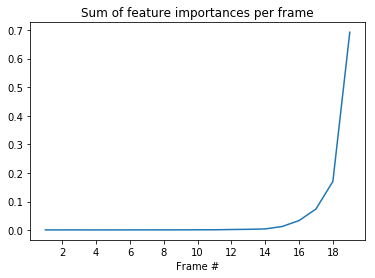

In [169]:
from matplotlib.ticker import MaxNLocator
plt.plot(np.arange(1,20), rf.feature_importances_.reshape(19,16).sum(axis=1))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Frame #")
plt.title("Sum of feature importances per frame")

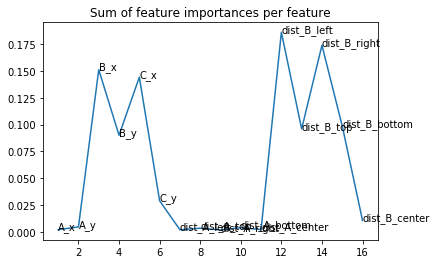

In [181]:
from matplotlib.ticker import MaxNLocator
xs = np.arange(1,17)
ys = rf.feature_importances_.reshape(19,16).sum(axis=0)
plt.plot(xs, ys)
ax = plt.gca()
for i, txt in enumerate(df.iloc[:,8:].columns):
    ax.annotate(txt, (xs[i],ys[i]))
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel("Feature #")
# plt.gca().set_xticklabels(df.iloc[:,8:].columns[::2])
plt.title("Sum of feature importances per feature")

In [173]:
df.iloc[:,8:].columns[15]

'dist_B_center'

# results using C_x, C_y only as features
ordered samples, 1 movie  
n_train_frames=19  
n_test_frames=1  
**RF (n_estimators=500)**  
Model trained (2.5484297275543213 seconds). Train score: 7.1290825838968095, test score: 11.514212490530277  
**Ridge**  
Model trained (0.04400348663330078 seconds). Train score: 2.8489899146736204, test score: 19.901146078544908  
**Linear Regression**  
Model trained (0.05202293395996094 seconds). Train score: 2.8489808147245377, test score: 19.901146078544908
# results using all features
ordered samples, 1 movie  
n_train_frames=19  
n_test_frames=1  
RF  
Model trained (13.325051069259644 seconds). Train score: 7.790062174672226, test score: 19.844266379758  
Ridge  
Model trained (0.007999658584594727 seconds). Train score: 3.2874721634444493, test score: 6.262216912537541  
Linear Regression  
Model trained (0.012000322341918945 seconds). Train score: 3.323811233046511, test score: 6.35928398745195